In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
datafile = os.path.join('data', 'ex1data1.txt')

In [3]:
data = np.loadtxt(datafile, delimiter=',')

In [4]:
population, profit = data[:,0], data[:,1]

# number of training examples
m = profit.size

Text(0,0.5,'Profit')

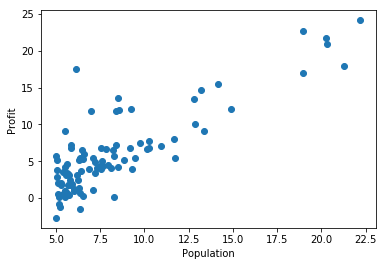

In [5]:
# Scatter plot to get an idea of the data
plt.scatter(population, profit)
plt.xlabel('Population')
plt.ylabel('Profit')

## Implementation of the linear regression

In [6]:
# First add a column of ones to population

population = np.stack([np.ones(m), population], axis=1)

In [7]:
# Cost function. 
# Computes the cost for using theta as the parameter for 
# the linear regression for fitting the data in x and y.

def cost_function(x, y, theta):
    m = len(y)
    hypothesis = x.dot(theta)
    cost = np.sum(np.square(hypothesis - y))
    return (1 / (2*m)) * cost

In [8]:
# Test the cost function

theta = np.array([0, 0])
cost_function(population, profit, theta)

32.072733877455676

In [9]:
# Gradient descent implementation

def gradient_descent(x, y, theta, alpha, iters):
    m = len(y)
    cost = np.zeros(iters)
    theta = theta.copy()
    
    for i in range(iters):
        hypothesis = x.dot(theta)
        error = hypothesis - y
        theta = theta - (alpha/m) * error.dot(x)
        cost[i] = cost_function(x, y, theta)
    
    return theta, cost

In [10]:
# Test gradient descent

alpha, iters = 0.01, 1000
theta, cost = gradient_descent(population, profit, theta, alpha, iters)

In [11]:
theta

array([-3.24140214,  1.1272942 ])

## Visualize and use the linear fit

Text(0,0.5,'Profit')

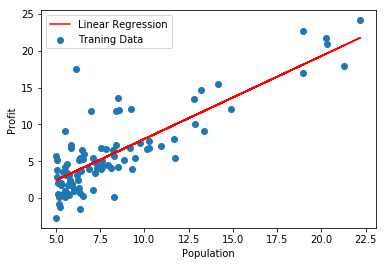

In [12]:
plt.scatter(population[:,1], profit, label='Traning Data')
plt.plot(population[:,1], population.dot(theta), 'r-', label='Linear Regression')
plt.legend()
plt.xlabel('Population')
plt.ylabel('Profit')

In [13]:
# Prediction using new theta

# Population: 35k, 70k
np.array([1, 3.5]).dot(theta), np.array([1, 7]).dot(theta)

(0.7041275642242226, 4.649657272722868)

Text(0,0.5,'Cost')

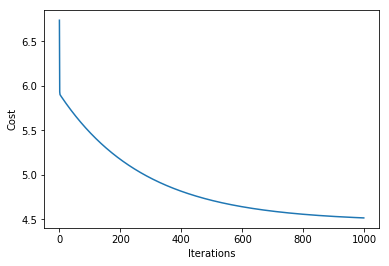

In [14]:
# Visualize the change in the cost function

plt.plot(np.arange(iters), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')

Text(0.5,0,'theta1')

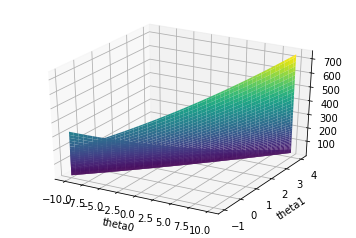

In [15]:
# Visualize the cost function

theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-1, 4, 100)
cost_vals = np.zeros([len(theta_0_vals), len(theta_1_vals)])
for i, theta_0 in enumerate(theta_0_vals):
    for j, theta_1 in enumerate(theta_1_vals):
        cost_vals[i, j] = cost_function(population, profit, [theta_0, theta_1])
        
cost_vals = cost_vals.T

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_vals, theta_1_vals, cost_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')

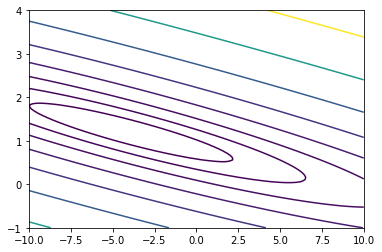

In [16]:
plt.contour(theta_0_vals, theta_1_vals, cost_vals, levels=np.logspace(-2, 3, 20))